## Homework 2

* Sklearn veri kümelerinden Şeker Hastalığı (Diabetes) Veri Kümesini içe aktarın.
* Ham veriyi inceleyin ve analiz edin.
* Regresyon uygulaması için ön işleme yapın.
* Veri kümenizi eğitim ve test alt kümlerine ayırın (eğitim için 0.7 ve test için 0.3 oran olacak şekilde).
* Ridge ve Lasso Regression modellerini, her biri için en az 5 farklı alfa değeri olacak şekilde deneyin.
* Tüm modellerin sonuçlarını değerlendirin ve en iyi performans gösteren modeli seçin.

In [ ]:
# Şeker Hastalığı Veri Kümesini içe aktarın

In [4]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [5]:
diabetes_data = load_diabetes()

In [26]:
diabetes_data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

In [7]:
df["target"]=diabetes_data.target

In [8]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s3      442 non-null    float64
 5   s4      442 non-null    float64
 6   s5      442 non-null    float64
 7   s6      442 non-null    float64
 8   target  442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


In [ ]:
# Yinelenen değerleri ve eksik verileri kontrol edin

In [10]:
df.duplicated().sum() #no duplicates

0

In [9]:
df.isna().sum() #no missing values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
# Her özellik için verileri görselleştirin (pairplot, distplot)

In [60]:
import seaborn as sns

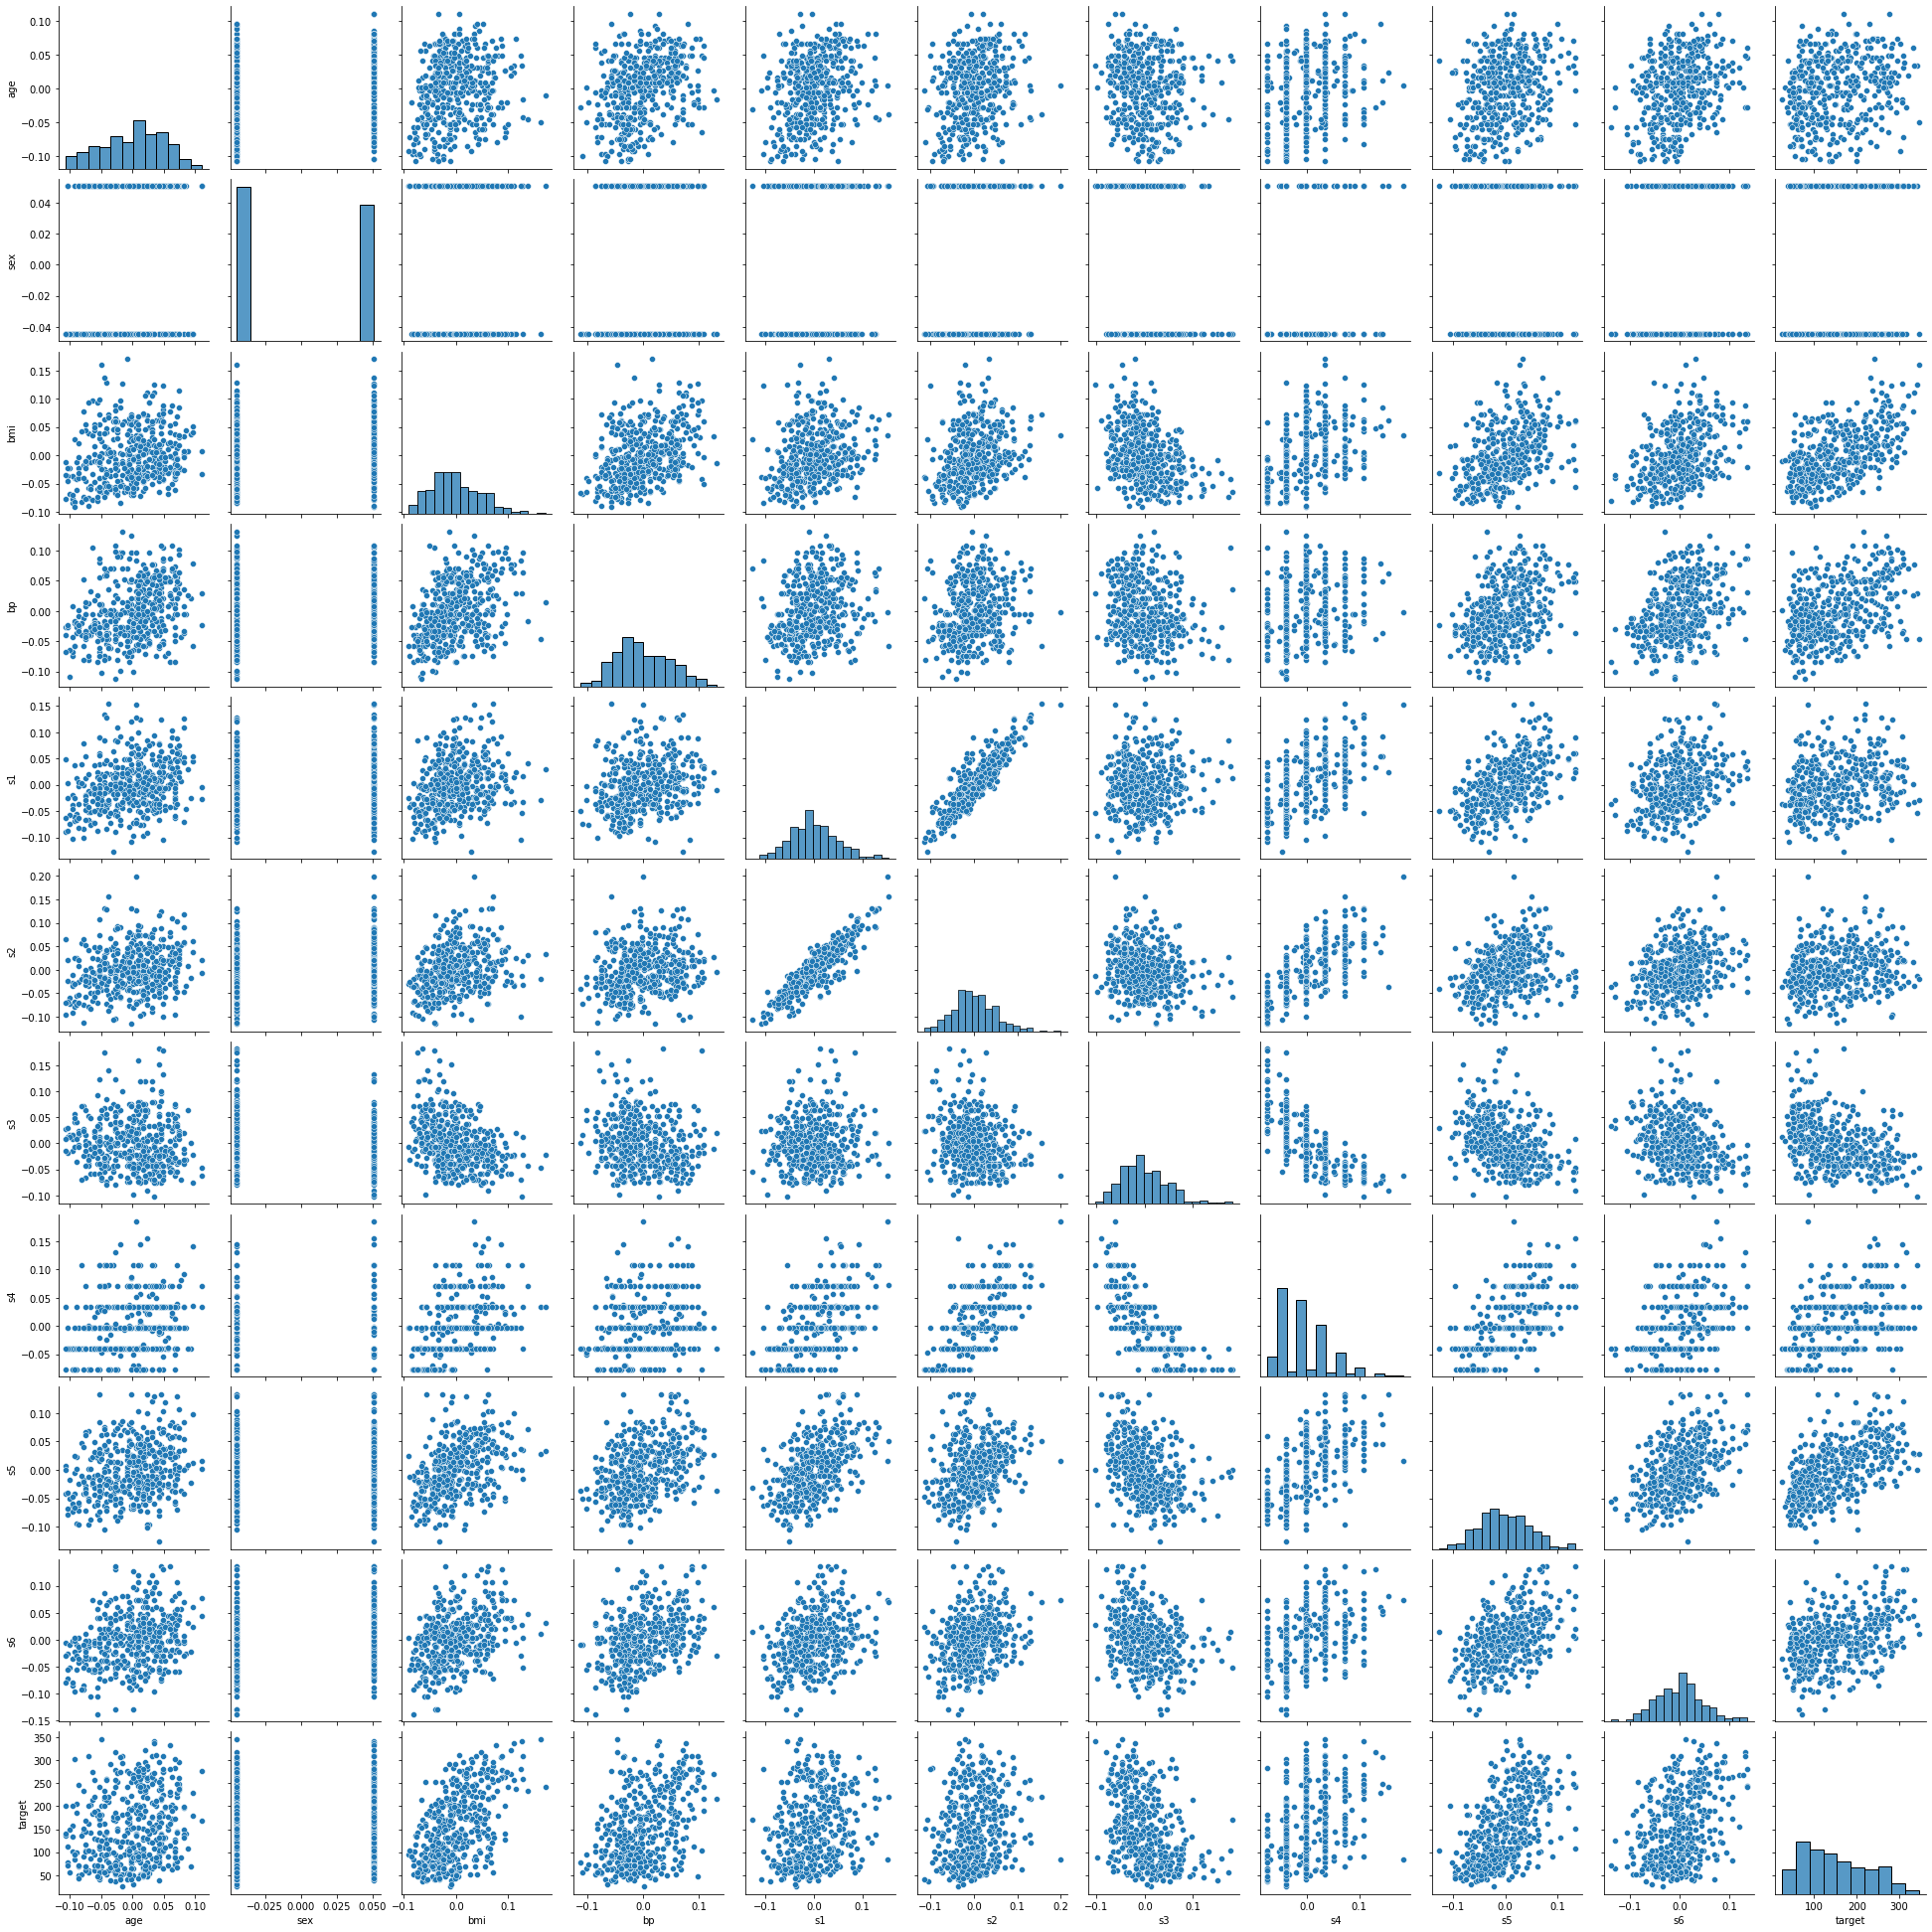

In [40]:
sns.pairplot(df)

Yukaridaki grafiklere göre ilk göze çarpan s1 ve s2 arasındaki güçlü korelasyondur, iki değişken arasındaki scatterplot lineer bir çizgi görünümdedir.
Diagonal olarak tüm değişkenlere ait histogram grafikleri gözlenebilir,ayrık değerlerin olduğu gözlenmektedir. en göze çarpan s4 değişkenindeki sağa çarpıklık, büyük ayrık değerlerin bulunduğu izlenimini veriyor

In [ ]:
# Korelasyon matrisini bastırın ve yorumlayın

In [43]:
import matplotlib.pyplot as plt

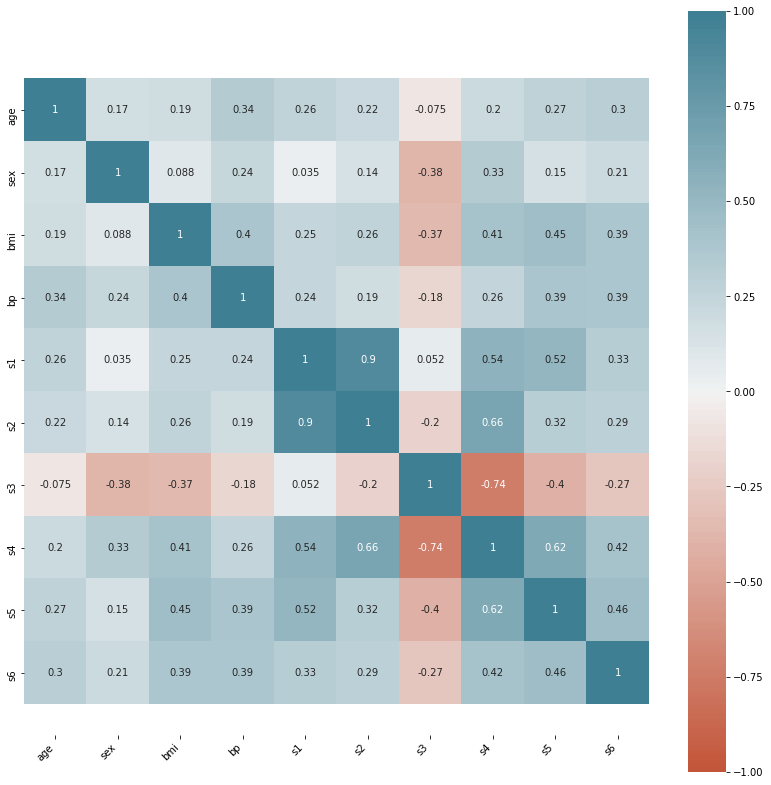

In [47]:
corr = df.iloc[:,:-1].corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

s1 ,s2 özellikleri 0.9 ile en yüksek pozitif korelasyona sahip özeliklerdir

In [ ]:
# İlişkili bulduğunuz özellikleri eleyin (korelasyon matrisini kontrol ederek)

s1 ve s2 özelliklerinden birini eleyebiliriz, target ile en az korelasyona sahip olanını eleyebiliriz

In [50]:
df[["s1","target"]].corr()

,s1,target
s1,1.000000,0.212022
target,0.212022,1.000000


In [51]:
df[["s2","target"]].corr()

,s2,target
s2,1.000000,0.174054
target,0.174054,1.000000


s1 ve s2 özelliklerinin ikisi de target ile koreloasyonu düşük özellikler, ikisi de elenebilir.

In [11]:
df.drop(["s1","s2"], inplace=True, axis=1)

In [12]:
df.head()

,age,sex,bmi,bp,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# Aykırı değerleri işleyin (IsolationForest kullanabilirsiniz)

Scaling ile aykırı değer tespiti

In [94]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.iloc[:,:-1]))

In [95]:
outliers = list(set(np.where(z > 3)[0]))
outliers
print("Scaling ile tespit edilen outlier sayısı {}".format(len(outliers)))

Scaling ile tespit edilen outlier sayısı 11


In [96]:
df.loc[outliers]

,age,sex,bmi,bp,s3,s4,s5,s6,target
256,-0.049105,-0.044642,0.160855,-0.046985,-0.047082,0.034309,0.028017,0.011349,346.0
322,0.023546,0.050680,0.061696,0.062039,-0.091262,0.155345,0.133396,0.081764,242.0
260,0.041708,-0.044642,-0.008362,-0.057314,0.151726,-0.076395,-0.080237,-0.017646,39.0
261,0.048974,-0.044642,-0.041774,0.104501,0.177497,-0.076395,-0.012908,0.015491,103.0
269,0.009016,-0.044642,-0.032073,-0.026328,0.159089,-0.076395,-0.011901,-0.038357,87.0
367,-0.009147,0.050680,0.170555,0.014987,-0.021311,0.034309,0.033657,0.032059,242.0
336,-0.020045,-0.044642,0.085408,-0.036656,-0.061809,0.145012,0.080948,0.052770,306.0
216,0.012648,0.050680,0.035829,0.049415,-0.069172,0.145012,0.045601,0.048628,248.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.173816,-0.039493,-0.004220,0.003064,57.0
58,0.041708,-0.044642,-0.064408,0.035644,0.181179,-0.076395,-0.000609,-0.050783,170.0


IsolationForest ile aykırı değer tespiti

In [16]:
from sklearn.ensemble import IsolationForest

In [97]:
clf = IsolationForest()
clf.fit(df.iloc[:,:-1])
outlier_detection = clf.predict(df.iloc[:,:-1])

In [98]:
outlier_if = df[np.where(outlier_detection == -1, True, False)] 
print("IsolationForest ile tespit edilen outlier sayısı {}".format(len(outlier_if)))

IsolationForest ile tespit edilen outlier sayısı 73


IsolationForest ile tespit edilen aykırı değerlerin sayısı, scaling ile tespit edilenlerin sayısından çok fazla, eğitimde yararlı olabilecek verilerin silinmesi ihtimaline karşı bize en çok veri bırakacak yöntem scaling ile ilerlenecektir. Sonuçlarda IsolationForest Yöntemi ile daha düşük R2 değerleri elde edildiği görüldü.

In [130]:
df_cleaned = df.drop(outliers,axis = 0).reset_index(drop = False)

In [ ]:
# Özellikleri ölçekleyin. (scaling)

Bağımsız değişkenler scaled edildiği için scalinge gerek bulunmamaktadır.

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612
target,442.0,1.521335e+02,77.093005,25.000000,87.000000,140.500000,211.500000,346.000000


In [ ]:
# Veri kümesini eğitim ve test verisetlerine ayırın.

In [131]:
X= df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [133]:
X_train ##288 eğitim verisi

,index,age,sex,bmi,bp,s3,s4,s5,s6
196,198,-0.052738,-0.044642,0.054152,-0.026328,-0.013948,-0.039493,-0.074089,-0.059067
356,365,0.034443,-0.044642,-0.038540,-0.012556,-0.006584,-0.002592,0.031193,0.098333
277,284,0.041708,0.050680,-0.022373,0.028758,-0.061809,-0.002592,0.002864,-0.054925
83,84,0.001751,-0.044642,-0.039618,-0.100923,0.044958,-0.050195,-0.068330,-0.129483
180,182,0.045341,0.050680,0.005650,0.056301,-0.039719,0.071210,0.015567,-0.009362
...,...,...,...,...,...,...,...,...,...
71,72,0.063504,0.050680,-0.004050,-0.012556,0.056003,-0.002592,0.084495,-0.017646
106,107,0.027178,-0.044642,0.049840,-0.055018,-0.058127,0.052759,-0.052959,-0.005220
270,277,-0.034575,-0.044642,-0.059019,0.001215,0.067048,-0.076395,-0.021394,0.015491
348,357,-0.060003,0.050680,0.049840,0.018429,-0.017629,-0.002592,0.049769,-0.059067


In [134]:
X_test #143 test verisi

,index,age,sex,bmi,bp,s3,s4,s5,s6
423,433,-0.027310,-0.044642,-0.060097,-0.029771,0.122273,-0.039493,-0.051401,-0.009362
75,76,-0.030942,0.050680,0.028284,0.070073,-0.054446,-0.047981,-0.030751,0.015491
296,303,0.074401,-0.044642,0.034751,0.094173,0.022869,-0.002592,0.073802,-0.021788
30,30,-0.060003,-0.044642,0.044451,-0.019442,0.022869,-0.039493,-0.027129,-0.009362
362,372,-0.027310,0.050680,-0.023451,-0.015999,0.026550,-0.002592,-0.010904,-0.021788
...,...,...,...,...,...,...,...,...,...
353,362,0.019913,0.050680,0.104809,0.070073,-0.024993,-0.002592,0.003712,0.040343
153,155,-0.027310,0.050680,0.060618,0.049415,-0.002903,0.034309,0.037814,0.048628
181,183,0.045341,0.050680,-0.035307,0.063187,-0.010266,-0.002592,0.015567,0.056912
109,110,0.041708,0.050680,-0.032073,-0.022885,0.030232,-0.039493,-0.126097,0.015491


In [ ]:
# Lasso ve Rdige modellerini Sklearn'dan içe aktarın.

In [135]:
from sklearn.linear_model import  Ridge, Lasso

In [ ]:
# Lasso için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

In [136]:
alpha = [0.001,0.01,0.1,1,10]

**Lasso - Eğitim Verileri**

In [137]:
for a in alpha:
  lasso_model = Lasso(alpha = a)
  lasso_model.fit(X_train, y_train)
  print(f'Lasso model R2 for alpha {a} is : {lasso_model.score(X_train, y_train)}')

Lasso model R2 for alpha 0.001 is : 0.4856528772979206
Lasso model R2 for alpha 0.01 is : 0.48549758217994043
Lasso model R2 for alpha 0.1 is : 0.4808701971882699
Lasso model R2 for alpha 1 is : 0.32298730741280435
Lasso model R2 for alpha 10 is : 0.001730245907969663


**Lasso Test Verileri**

In [138]:
for a in alpha:
  lasso_model = Lasso(alpha = a)
  lasso_model.fit(X_test, y_test)
  print(f'Lasso model R2 for alpha {a} is : {lasso_model.score(X_test, y_test)}')

Lasso model R2 for alpha 0.001 is : 0.5474754958681716
Lasso model R2 for alpha 0.01 is : 0.5473384632748366
Lasso model R2 for alpha 0.1 is : 0.537973753315278
Lasso model R2 for alpha 1 is : 0.39567627636167285
Lasso model R2 for alpha 10 is : 0.007428071637816447


In [ ]:
# Ridge için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

**Ridge Eğitim Verileri**

In [139]:
for a in alpha:
  ridge_model = Ridge(alpha = a)
  ridge_model.fit(X_train, y_train)
  print(f'Ridge model R2 for alpha {a} is : {ridge_model.score(X_train,y_train)}')

Ridge model R2 for alpha 0.001 is : 0.4856532545905413
Ridge model R2 for alpha 0.01 is : 0.48554732111443943
Ridge model R2 for alpha 0.1 is : 0.48028202452753765
Ridge model R2 for alpha 1 is : 0.3988399229246866
Ridge model R2 for alpha 10 is : 0.13217471477949494


**Ridge Test Verileri**

In [140]:
for a in alpha:
  ridge_model = Ridge(alpha = a)
  ridge_model.fit(X_test, y_test)
  print(f'Ridge model coef for alpha {a} is : {ridge_model.score(X_test,y_test)}')

Ridge model coef for alpha 0.001 is : 0.547469870775812
Ridge model coef for alpha 0.01 is : 0.5469106458655284
Ridge model coef for alpha 0.1 is : 0.5283173484568058
Ridge model coef for alpha 1 is : 0.34696674907799957
Ridge model coef for alpha 10 is : 0.07883795218335998


In [ ]:
# Sonuçlar hakkında yorum yapın. En iyi modelin katsayısını yazdırın.

Sonuçlara göre en iyi model 0.001 alpha değeri ile Lasso modelidir. Aynı alpha değeri ile Ridge modelde de çok benzer bir R2 elde edildi. 


* Ridge Test R2   : 0.5474698707758125
* **Lasso Test R2 : 0.5474754958681716**

R2 1 e ne kadar yakınsa datanın modele o kadar fit ettiği söylenebilir, 2 modelde de R2 değerleri düşük olduğundan, 2 modelin de başarısız olduğu söylenebilir.

alpha 0.001 değeri için katsayılar

En yüksek test R2 e sahip olan Lassı Katsayıları

In [90]:
alpha_result = 0.001
lasso_model = Lasso(alpha = alpha_result)
lasso_model.fit(X_train, y_train)
print('Lasso model coeff for alpha {} is : {}'.format(alpha_result,lasso_model.coef_))

Lasso model coeff for alpha 0.001 is : [  31.84614249 -208.79652815  513.06778959  343.27200815 -353.86324595
  -74.18905135  407.0609093    77.60198218]


Lasso'ya çok yakın sonuçlar veren Ridge model Katsayıları

In [91]:
ridge_model = Ridge(alpha = alpha_result)
ridge_model.fit(X_train, y_train)
print(f'Ridge model coeff for alpha {alpha_result} is : {ridge_model.coef_}')

Ridge model coeff for alpha 0.001 is : [  32.40048787 -208.9285364   512.59059408  343.1250563  -354.50717618
  -75.06153364  407.00033658   78.23225391]
